In [37]:
from Library import Algorithm, Cloud, Manifolds
import numpy as np
import math

import matplotlib.pyplot as plt

In [38]:

def equation(x, t):
    eq = [0, 0]

    eq[0] = 17.3*math.cos(x[0]) + 7.8*math.cos(x[1]) + 4.5*math.cos(x[2]) - t[0]
    eq[1] = 17.3*math.sin(x[0]) + 7.8*math.sin(x[1]) + 4.5*math.sin(x[2]) - t[1]

    return eq

def equation2(x, t):
    eq = np.zeros(2)

    eq[0] = math.cos(x[0]) + math.cos(x[1])
    eq[1] = math.sin(x[0]) + math.sin(x[1])

    return eq

def Jx(x, t):
    J = np.zeros((2, 3))

    J[0, 0] = -17.3*math.sin(x[0])
    J[0, 1] = -7.8*math.sin(x[1])
    J[0, 2] = -4.5*math.sin(x[2])

    J[1, 0] = 17.3*math.cos(x[0])
    J[1, 1] = 7.8*math.cos(x[1])
    J[1, 2] = 4.5*math.cos(x[2])

    return J

def Jt(x, t):
    J = np.zeros((2, 2))

    J[0, 0] = 1
    J[0, 1] = 0

    J[1, 0] = 0
    J[1, 1] = 1

    return J


In [39]:

N = 50

n = 2
m = 1

h = 5 * 2*6.14/N

xs = [np.linspace(-1, 1, 2*N), np.linspace(-3.14, 3.14, 2*N), np.linspace(-3.14, 3.14, 2*N)]
x0s = [np.linspace(-1, 1, 2), np.linspace(-3.14, 3.14, 2), np.linspace(-3.14, 3.14, 2)]

t = Cloud.carteisan_product([np.linspace(-40, 40, N), np.linspace(-40, 40, N)])

dx = np.array([h, h])


barriers, markers, indexes = Algorithm.GetBorders(xs, x0s, t, dx, equation, 2, Jx, Jt)
barriers = np.array(barriers)



100%|██████████| 2500/2500 [01:09<00:00, 35.95it/s] 
2500it [03:45, 11.09it/s] 


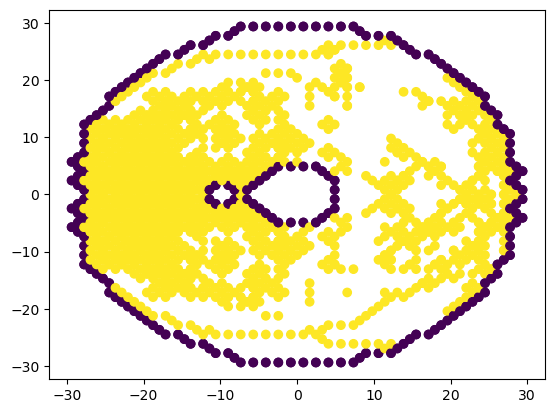

In [40]:

plt.scatter(barriers[:, 0], barriers[:, 1], c = markers)
plt.show()

In [41]:
slices = Cloud.GetSlices(xs, x0s, t, equation, 2)

for i in range(len(indexes)):
    #plot manifolds from indexes

    key1 = list(slices.keys())[indexes[i][0]]
    key2 = list(slices.keys())[indexes[i][1]]

    man1 = slices[key1]
    man2 = slices[key2]

    man1 = np.array(man1)
    man2 = np.array(man2)

    if (len(man1) == 0 or len(man2) == 0):
        continue

    #3d plot of manifolds

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(man1[:, 0], man1[:, 1], man1[:, 2], c='r', marker='o')
    ax.scatter(man2[:, 0], man2[:, 1], man2[:, 2], c='b', marker='o')

    plt.show()

  9%|▉         | 222/2500 [00:56<09:41,  3.92it/s]


KeyboardInterrupt: 